In [1]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from keras import optimizers
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [111]:
raw_df = pd.read_excel('C:\\Users\\Merci\\Desktop\\New folder\\credit-card-default-prediction\\default_of_credit_card_clients.xls', skiprows=1)
raw_df.drop(['ID'], axis = 1, inplace = True)

In [121]:
raw_df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [123]:
data_one_hot = pd.get_dummies(raw_df, columns=['EDUCATION', 'MARRIAGE', 'SEX'])
data_one_hot.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month',
       'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'SEX_1', 'SEX_2'],
      dtype='object')

In [180]:
X = data_one_hot[['LIMIT_BAL', 'AGE', 'PAY_0','BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'SEX_1', 'SEX_2']]

y = data_one_hot['default payment next month']

In [181]:
len(X.columns)

23

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [183]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [184]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [188]:
print('Building Neural Network model...')
adam = optimizers.adam(lr = 0.01, decay = 0.0001)

model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1],
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(1e-10),
                activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(32,
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(1e-10),
                activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(8,
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(1e-10),
                activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy", optimizer='adam')
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=50)]

history = model.fit(X_train, y_train, validation_split=0.20, epochs=200, batch_size=1024, callbacks=callbacks)

Building Neural Network model...
Train on 26153 samples, validate on 6539 samples
Epoch 1/200
26153/26153 [==============================] - 3s 109us/step - loss: 0.6825 - val_loss: 0.8475
Epoch 2/200
26153/26153 [==============================] - 0s 14us/step - loss: 0.6610 - val_loss: 0.9146
Epoch 3/200
26153/26153 [==============================] - 0s 12us/step - loss: 0.6492 - val_loss: 0.9200
Epoch 4/200
26153/26153 [==============================] - 0s 11us/step - loss: 0.6310 - val_loss: 0.9087
Epoch 5/200
26153/26153 [==============================] - 0s 12us/step - loss: 0.6103 - val_loss: 0.8674
Epoch 6/200
26153/26153 [==============================] - 0s 12us/step - loss: 0.5900 - val_loss: 0.8109
Epoch 7/200
26153/26153 [==============================] - 0s 11us/step - loss: 0.5703 - val_loss: 0.6857
Epoch 8/200
26153/26153 [==============================] - 0s 12us/step - loss: 0.5515 - val_loss: 0.6359
Epoch 9/200
26153/26153 [==============================] - 0s 11us/st

Epoch 77/200
26153/26153 [==============================] - 0s 11us/step - loss: 0.4509 - val_loss: 0.3140
Epoch 78/200
26153/26153 [==============================] - 0s 11us/step - loss: 0.4482 - val_loss: 0.2686
Epoch 79/200
26153/26153 [==============================] - 0s 12us/step - loss: 0.4481 - val_loss: 0.2895
Epoch 80/200
26153/26153 [==============================] - 0s 11us/step - loss: 0.4485 - val_loss: 0.3066
Epoch 81/200
26153/26153 [==============================] - 0s 12us/step - loss: 0.4506 - val_loss: 0.2811
Epoch 82/200
26153/26153 [==============================] - 0s 11us/step - loss: 0.4461 - val_loss: 0.3260
Epoch 83/200
26153/26153 [==============================] - 0s 12us/step - loss: 0.4484 - val_loss: 0.3234
Epoch 84/200
26153/26153 [==============================] - 0s 12us/step - loss: 0.4485 - val_loss: 0.2750
Epoch 85/200
26153/26153 [==============================] - 0s 14us/step - loss: 0.4491 - val_loss: 0.2883
Epoch 86/200
26153/26153 [===========

26153/26153 [==============================] - 0s 11us/step - loss: 0.4277 - val_loss: 0.2405
Epoch 154/200
26153/26153 [==============================] - 0s 11us/step - loss: 0.4297 - val_loss: 0.2265
Epoch 155/200
26153/26153 [==============================] - 0s 15us/step - loss: 0.4234 - val_loss: 0.2212
Epoch 156/200
26153/26153 [==============================] - 0s 16us/step - loss: 0.4284 - val_loss: 0.2372
Epoch 157/200
26153/26153 [==============================] - 0s 13us/step - loss: 0.4239 - val_loss: 0.2356
Epoch 158/200
26153/26153 [==============================] - 0s 11us/step - loss: 0.4253 - val_loss: 0.2404
Epoch 159/200
26153/26153 [==============================] - 0s 11us/step - loss: 0.4243 - val_loss: 0.2125
Epoch 160/200
26153/26153 [==============================] - 0s 12us/step - loss: 0.4261 - val_loss: 0.2138
Epoch 161/200
26153/26153 [==============================] - 0s 11us/step - loss: 0.4249 - val_loss: 0.2330
Epoch 162/200
26153/26153 [===============

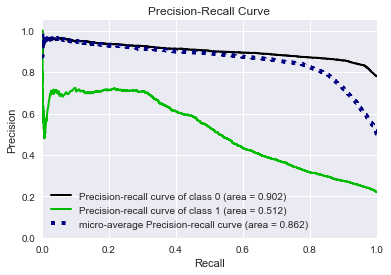

In [189]:
y_hat = model.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, np.concatenate([1-y_hat, y_hat], axis = 1))
plt.show()

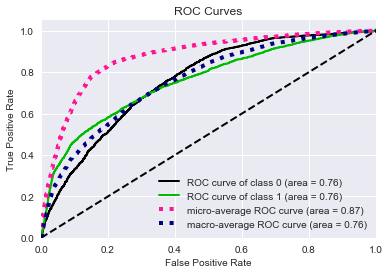

In [190]:
y_hat = model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, np.concatenate([1-y_hat, y_hat], axis = 1))
plt.show()

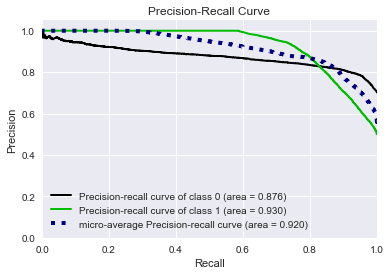

In [191]:
y_hat_train = model.predict_proba(X_train)
skplt.metrics.plot_precision_recall_curve(y_train, np.concatenate([1-y_hat_train, y_hat_train], axis = 1))
plt.show()

In [174]:
y_hat_01 = model.predict_classes(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_hat_01)

array([[6599,  431],
       [1216,  754]], dtype=int64)

In [169]:
y_hat_train_01 = model.predict_classes(X_train)
confusion_matrix(y_train, y_hat_train_01)

array([[15536,   798],
       [ 3762, 12572]], dtype=int64)

In [155]:
from sklearn.metrics import recall_score

recall_score(y_test, y_hat_01)

0.3761421319796954

In [157]:
from sklearn.metrics import precision_score

precision_score(y_test, y_hat_01)

0.6465968586387435

In [159]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat_01)

0.47560975609756095

In [175]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_hat_01)

0.817

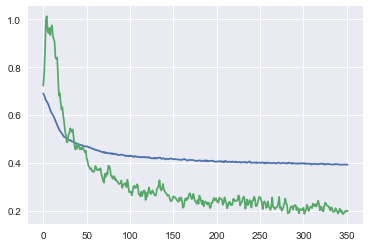

In [177]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])